In [1]:
%load_ext autoreload
%autoreload 2
import Integral as In
import Raiz as rr
import Interpolacion1 as Inter
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Ejercicio 1

    Considero que el mejor metodo para encontrar los puntos es el metodo de Lagrenge, ya que son pocos puntos y este metodo es bueno para dar un aproximado de la funcion
## Comparando con polyfit
    Como podemos observar al incrementar l grado de la funcion se hacemeja mas a nuestra interpolación, ya que cuando son puntos menores a 4, (4 < n) la funcion no pasa por todos los puntos, se acerca pero no es capaz de tocarlos

In [22]:
x =[2,3,4,5,6]
y =[2,6,5,5,6]
x2, y2 = Inter.poli_cardinal(x,y)
P = np.polyfit(x,y,4)
f = np.poly1d(P)
y3 = f(x2)


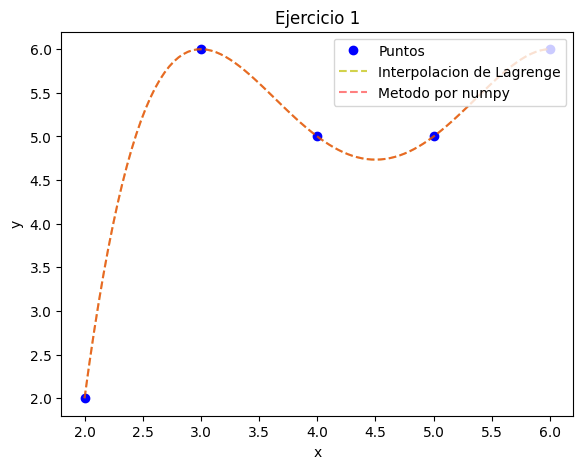

In [23]:
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  

axes.plot(x, y, 'bo', label = 'Puntos')
axes.plot(x2,y2, 'y--', alpha = 0.7, label = 'Interpolacion de Lagrenge')
axes.plot(x2,y3, 'r--', alpha = 0.5, label = 'Metodo por numpy')
axes.legend(loc=1)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Ejercicio 1')
plt.show()

# Ejercicio 2

    Usaria el metodo de interpolación de lagrange, ya que considero es una buena opción, para el caso del spin lineal, es una opción que se ve bien ya que no suele tener una desviación tan exagerada, lo malo es que cuando son pocos puntos tiende a verde como rectas
## Metodo cubico

Considero que se ve una muy buena opción, al trazarlo tiene curvas que se logran ver suaves en la función 

In [80]:
f = lambda x: 1/(1+x**2)
x = np.linspace(-5,5,12)
y = [f(i) for i in x]

# x2 = np.linspace(x[0],x[-1],50)
# y2 = [Inter.polinomial_Newton(x,y,i) for i in x2]
x2, y2 = Inter.poli_cardinal(x,y)
x3, y3 = Inter.Interpolacion_lineal(x,y)

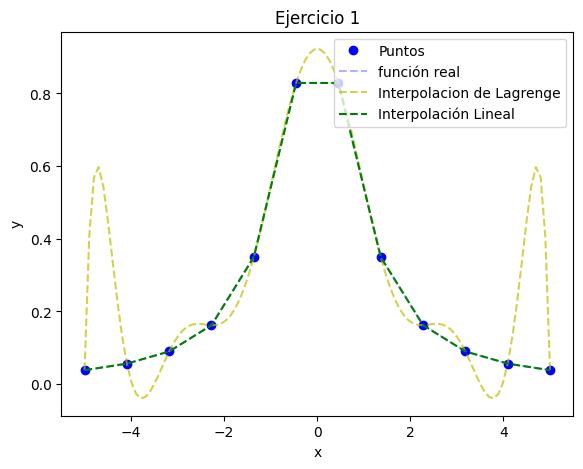

In [85]:
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  

axes.plot(x, y, 'bo', label = 'Puntos')
axes.plot(x, f(x), 'b--', alpha = 0.3,label = 'función real')
axes.plot(x2,y2, 'y--', alpha = 0.7, label = 'Interpolacion de Lagrenge')
axes.plot(x3,y3, 'g--', label = 'Interpolación Lineal')
axes.legend(loc=1)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Ejercicio 1')
plt.show()

## Justificación

Podemos ver que con el metodo de lagrenge, cuando hay muy pocos puntos la funcion se vera con picos grandes a sus inicios, pero cuando los puntos los graficamos con la interpolación lineal podemos ver que nuestra función se puede ver de la mejor manera, es decir no se logran ver errores al inicio, pero cuando se aproxima a la punto no es capaz de obtener su maximo. Aunque cuando hay muy pocos puntos la función se asemeja al spin lineal

# Ejercicio 3

In [53]:
def D_central(x,f,h = 1e-3):
    return (f(x+h/2) - f(x-h/2))/h
    
def EA_func(x,f1,f2,h = 1e-3):
    '''
    Error de mi función absoluto
    ---------------------
    x: Punto a evaluar
    f1: Función creada
    f2: Funcion real
    h: cantidad de puntos a partir
    ---------------------
    salida: Error de la función absoluto
    '''
    xo = f2(x)
    E = abs(D_central(x,f1,h))*abs(x-xo)
    return E
def ER_func(x,f,f1,h = 1e-3):
    '''
    Error de la función relativa
    x:Punto a evaluar
    h: cantidad de puntos a partir
    ---------------------
    salida: Error de la función relativo
    '''
    xo = f1(x)
    E = (x/f(x))*abs(D_central(x,f,h))*abs((x-xo)/(1+xo))
    return E

In [27]:
# Crearemos una funcion que use los polinomios de lagrenge para evaluarlos enun solo punto
def función_L(xv,yv,x, n = 2):
    p = 0
    for k in range(n):
        p = p + yv[k] * Inter.lagrenge(x,xv,k)
    return p

In [54]:
x = [0,1,2,3,4]
f = lambda x: np.exp(0.5*x)
y = [f(i) for i in x]
x2 = 2.4

y2 = función_L([1,2,3],[y[1],y[2],y[3]],x2,3)
y3 = función_L(x,y,x2,5)

x4,y4 = Inter.poli_cardinal(x,y)
# Analizar la oscilación del punto de grado 2

x5 = [1,2,3]
y5 = [y[1],y[2],y[3]]
x6,y6 = Inter.poli_cardinal(x5,y5)
# Evaluar el error de la funcion 

f2 = lambda x1: función_L(x,y,x1,)
E1 = EA_func(1.7,f2,f)
E2 = ER_func(1.7,f2,f)
print("Error absoluto de la función:",E1)
print("Error relativo de la función:",E1)

Error absoluto de la función: 1.0064415488918186
Error relativo de la función: 1.0064415488918186


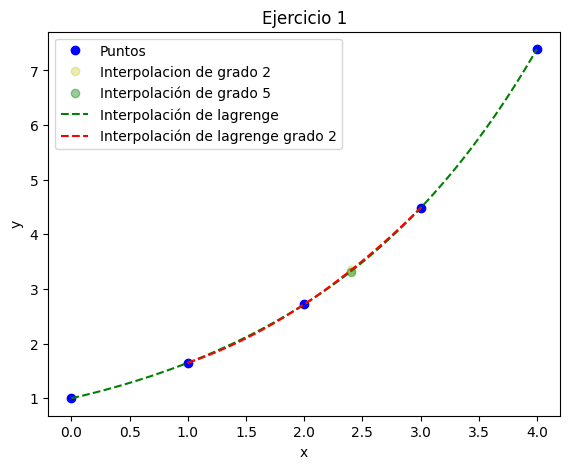

In [31]:
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  

axes.plot(x, y, 'bo', label = 'Puntos')
axes.plot(x2,y2, 'yo', alpha = 0.3, label = 'Interpolacion de grado 2')
axes.plot(x2,y3, 'go', alpha = 0.4,label = 'Interpolación de grado 5')
axes.plot(x4,y4, 'g--', label = 'Interpolación de lagrenge')
axes.plot(x6,y6, 'r--', label = 'Interpolación de lagrenge grado 2')
axes.legend(loc=0)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Ejercicio 1')
plt.show()

# Ejercicio 4
Usaria el metodo de Interpolación de Lagrenge nos ayuda cuando la funcion no completa un periodo que es este caso, en el caso que viene donde la función es periodico podemos usar la interpolacion trigonometrica
## ¿Ventaja si el intervalo es de $(0,2\pi)$?
Nos ayuca para cuando el intervalo es mayor, tenemos las ventajas para la interpolación trigonometrica, con esto podemos hacer una mejor presición 

In [55]:
f = lambda x: np.sin(x)
x = np.linspace(0,np.pi/2,5)
y = [f(i) for i in x]
x1,y1 = Inter.Interpolacion_lineal(x,y)
# /////////////////////////////
def Interpo_trigo(x,xv,yv):
    ak, bk = Inter.Constantes(xv,yv)
    n = len(ak)+len(bk)
    m = n//2
    F = 0.5 * (ak[0] + ak[-1] * np.cos(m * x)) 
    for j in range(1,m):
        F = F + ak[j]*np.cos(j*x) + bk[j-1]*np.sin(j*x)           
    return F
f2 = lambda x1: Interpo_trigo(x1,x,y)
Integral = In.I_trapecio([0,np.pi/2],f)
print('El valor de la integral de esta función es:',Integral)
# Me falta calcular el error
x2 = np.linspace(0,2*np.pi,5)
y2 = [f2(i) for i in x2]
x3,y3 = Inter.Interpo_trigo(x2,y2)

f2 = lambda x1: Interpo_trigo(x1,x2,y2)
I2 = In.I_trapecio([0,np.pi*2],f2)
E3 = EA_func(x,f2,f)
print('El valor de la integral de esta función es:',I2)
print("Error relativo de la función:",E3)

El valor de la integral de esta función es: 0.999430359598276
El valor de la integral de esta función es: 6.3224076439093935
Error relativo de la función: [0.         0.00863028 0.02233261 0.10552885 0.63312919]


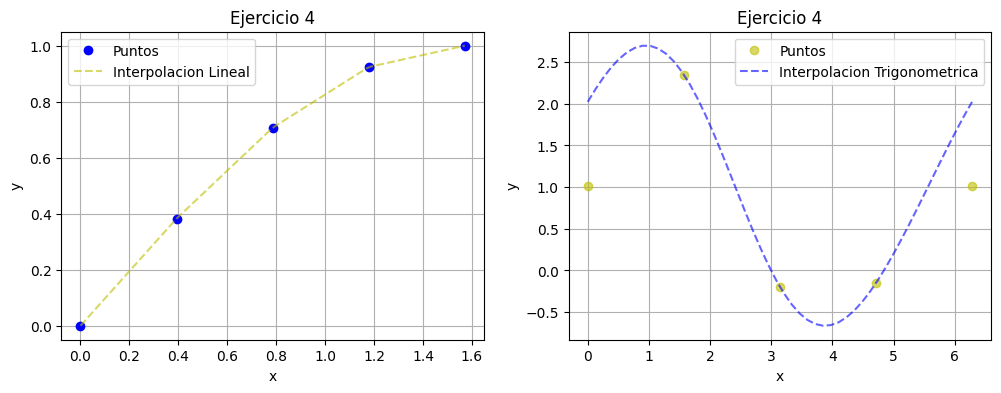

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(x, y, 'bo', label = 'Puntos')
axes[0].plot(x1,y1, 'y--', alpha = 0.6, label = 'Interpolacion Lineal')
axes[0].legend(loc=0)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Ejercicio 4')
axes[0].grid()

axes[1].plot(x2,y2, 'yo', alpha = 0.6, label = 'Puntos')
axes[1].plot(x3,y3, 'b--', alpha = 0.6, label = 'Interpolacion Trigonometrica')
axes[1].legend(loc=0)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Ejercicio 4')
axes[1].grid()
plt.show()

# Ejercicio 5

Usaria el metodo del baricentro, ya que considero que es una buena opcion teniendo en cuenta que que no podemos usar la interpolacion trigonometrica ya que no hay continuidad con 3 puntos

In [15]:
def weights(dataxs):
    n = dataxs.size
    ws = np.ones(n)
    for k in range(n):
        for j in range(n):
            if j == k:
                continue
            ws[k] *= (dataxs[k]-dataxs[j])
    return 1/ws

def bary(dataxs, datays, x):
    k = np.where(x == dataxs)[0]
    ws = weights(dataxs)
    if k.size == 0:
        nume = np.sum(ws*datays/(x-dataxs))
        denom = np.sum(ws/(x-dataxs))
        val = nume/denom
    else:
        val = datays[k[0]]
    return val

In [36]:
# n = 3
n = 6
x = np.linspace(-1,-1/5,n)
f = lambda x: np.sin(x) + x**2
n1 = len(x)
y = [f(x[i]) for i in range(n1)]
# Generando nodos
x1 = np.linspace(-1,-1/5,50)
y1 = [bary(x,y,i) for i in x1]

f2 = lambda x2: bary(x,y,x2)
x2 = rr.raiz_biseccion([-1,-1/5],f2)
y2 = f2(x2)

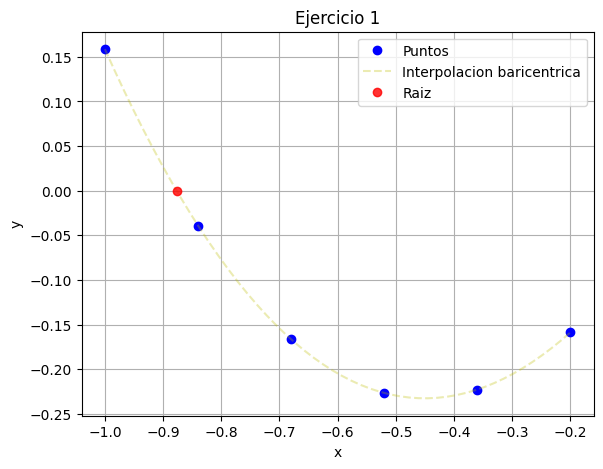

In [42]:
fig = plt.figure() 
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])  

axes.plot(x, y, 'bo', label = 'Puntos')
axes.plot(x1,y1, 'y--', alpha = 0.3, label = 'Interpolacion baricentrica')
axes.plot(x2,y2, 'ro', alpha = 0.8, label = 'Raiz')
axes.legend(loc=0)
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Ejercicio 1')
axes.grid()
plt.show()